# Final Project

#### NYC Housing Data Analysis
* NYC_Housing_2018 is a dataframe with 20 columns and 82140 entries.
* The datatype is mixed and has missing data. 
* The *Borough*, *Block*, *Lot*, *Zip_Code*, *Residential_Units*, *Commercial_Units* and *Total_Units* have Integer datatype
* The EaseMent column has all null values.
* The Apt._No. columns has majority null values.
* The *Land_Sq_Ft*, *Gross_Sq_Ft*, *Year_Built* and *Sale_Price columns have float datatype whereas the rest of the columns are string objects dtype. 
* The *Sale_Date* column has dates as string objects. The dates range from November 2017 to October 2018.



![NYC](https://cdn.vox-cdn.com/thumbor/ZnP9cnjIn60slvybF_34lby1uMk=/0x0:2000x1125/1200x675/filters:focal(840x403:1160x723)/cdn.vox-cdn.com/uploads/chorus_image/image/58203557/171109_06_49_10_5DSR4201.0.jpg)

#### 1. Import standard libraries

In [2]:
# importing numpy, pandas and matplotlib libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline
plt.style.use('ggplot')

#### 2. Loading the Source Data

In [4]:
# Loading data from the 2018.csv file with new column labels
col_names = ['Borough', 'Neighborhood', 'Building_Class_Category', 'Tax_Class_Current', 'Block', 'Lot', 'EaseMent', 'Building_Class_Current', 'Address', 'Apt._No.', 'Zip_Code', 'Residential_Units', 'Commercial_Units', 'Total_Units', 'Land_Sq_Ft', 'Gross_Sq_Ft', 'Year_Built', 'Tax_Class_AtSale', 'Building_Class_AtSale', 'Sale_Price', 'Sale_Date']
data=pd.read_csv("NYC_Housing_2018.csv", header=0, parse_dates=True, index_col='Sale_Date', names=col_names,  na_values=[' ', ' $-   '])

#### 3. Exploring the Data 

In [5]:
print(data.shape)
data.info()
data.head()

(82140, 20)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82140 entries, 2018-05-22 to 2017-11-30
Data columns (total 20 columns):
Borough                    82140 non-null int64
Neighborhood               82140 non-null object
Building_Class_Category    82140 non-null object
Tax_Class_Current          82073 non-null object
Block                      82140 non-null int64
Lot                        82140 non-null int64
EaseMent                   0 non-null float64
Building_Class_Current     82073 non-null object
Address                    82140 non-null object
Apt._No.                   18587 non-null object
Zip_Code                   82140 non-null int64
Residential_Units          82140 non-null int64
Commercial_Units           82140 non-null int64
Total_Units                82140 non-null int64
Land_Sq_Ft                 47349 non-null float64
Gross_Sq_Ft                44890 non-null float64
Year_Built                 75696 non-null float64
Tax_Class_AtSale           82140 non

,Borough,Neighborhood,Building_Class_Category,Tax_Class_Current,Block,Lot,EaseMent,Building_Class_Current,Address,Apt._No.,Zip_Code,Residential_Units,Commercial_Units,Total_Units,Land_Sq_Ft,Gross_Sq_Ft,Year_Built,Tax_Class_AtSale,Building_Class_AtSale,Sale_Price
Sale_Date,,,,,,,,,,,,,,,,,,,,
2018-05-22,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009,1,0,1,987.0,2183.0,1860.0,1,A4,4844809.0
2018-05-23,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009,1,0,1,987.0,2183.0,1860.0,1,A4,NaN
2018-04-25,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,NaN,B1,113 AVENUE C,NaN,10009,2,0,2,1218.0,4764.0,1899.0,1,B1,NaN
2018-09-07,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,NaN,C7,21-23 AVENUE B,NaN,10009,12,4,16,4186.0,10588.0,1900.0,2,C7,10350000.0
2018-09-05,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,NaN,C1,200 EAST 7TH STREET,NaN,10009,18,0,18,2271.0,10650.0,1910.0,2,C1,5000000.0


#### 4.Cleaning the Data: 
* Drop the NaNs or Missing Data
* Convert the column with category values to str and year to datetime 

In [6]:
# Dropping columns Easement with all null values and column Apt.No with majority null values 
data.drop(['EaseMent', 'Apt._No.'], axis=1, inplace=True)

#Dropping null values
data.dropna(axis=0, how='any', inplace=True)

# Change the dtype of columns Borough, Block, Lot, Zip_Code, Tax_Class_AtSale from int to str 
data['Borough'] = data.Borough.astype(str)
data['Block'] = data.Block.astype(str)
data['Lot'] = data.Lot.astype(str)
data['Tax_Class_AtSale'] = data.Tax_Class_AtSale.astype(str)
data['Zip_Code'] = data.Zip_Code.astype(str)

data['Year_Built'] = data.Year_Built.astype(int)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29028 entries, 2018-05-22 to 2017-11-30
Data columns (total 18 columns):
Borough                    29028 non-null object
Neighborhood               29028 non-null object
Building_Class_Category    29028 non-null object
Tax_Class_Current          29028 non-null object
Block                      29028 non-null object
Lot                        29028 non-null object
Building_Class_Current     29028 non-null object
Address                    29028 non-null object
Zip_Code                   29028 non-null object
Residential_Units          29028 non-null int64
Commercial_Units           29028 non-null int64
Total_Units                29028 non-null int64
Land_Sq_Ft                 29028 non-null float64
Gross_Sq_Ft                29028 non-null float64
Year_Built                 29028 non-null int64
Tax_Class_AtSale           29028 non-null object
Building_Class_AtSale      29028 non-null object
Sale_Price                 29028 non-null f

#### 5.Filtering Dataframe 

In [7]:
# Creating new dataframe as copy of a slice by filtering dataframe with conditional logic using boolean operators .
df= data[(data.Sale_Price >= 100000) & (data.Sale_Price <= 10000000)].copy()
df.shape

(27239, 18)

#### 6. Descriptive Statistics

In [8]:
# Descriptive statistics of the dataframe df
df.describe()

,Residential_Units,Commercial_Units,Total_Units,Land_Sq_Ft,Gross_Sq_Ft,Year_Built,Sale_Price
count,27239.000000,27239.000000,27239.000000,27239.000000,27239.000000,27239.000000,2.723900e+04
mean,2.051030,0.131539,2.182569,3316.696758,2542.732406,1940.910900,9.765255e+05
std,3.433395,0.770531,3.534787,10202.737152,5085.217419,29.946681,1.100990e+06
min,0.000000,0.000000,0.000000,200.000000,120.000000,1800.000000,1.000000e+05
25%,1.000000,0.000000,1.000000,2000.000000,1349.000000,1920.000000,4.850000e+05
50%,2.000000,0.000000,2.000000,2500.000000,1831.000000,1930.000000,6.800000e+05
75%,2.000000,0.000000,2.000000,3840.000000,2551.500000,1960.000000,9.888880e+05
max,134.000000,42.000000,134.000000,970000.000000,285471.000000,2018.000000,1.000000e+07


#### 7. Plot of NYC Housing Sale numbers classified by Boroughs

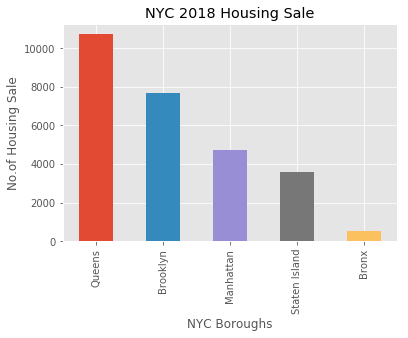

In [9]:
# Plot the number of NYC Housing Sale in 2017-18 classified by Boroughs.  . 
df['Borough'].value_counts()[:].plot(kind='bar')
plt.ylabel('No.of Housing Sale')
plt.title("NYC 2018 Housing Sale")
plt.xlabel('NYC Boroughs')
tick_val = [0, 1, 2, 3, 4]
tick_lab = ['Queens', 'Brooklyn', 'Manhattan', 'Staten Island', 'Bronx']
plt.xticks(tick_val, tick_lab)
plt.show()

* The bar plot represents the number of Housing Sale in NYC for 2017-18
* The Housing Sale are classified into the five Boroughs of NYC.
* Queens Borough had the highest number of sale, followed by Brooklyn. 
* Bronx had the least number of Sale in the given period.

#### 8. Trend in number of Residential and Commercial Units
* Plot the number of Residential Units in properties sold over time
* Plot the number of Commercial Units in properties sold over time


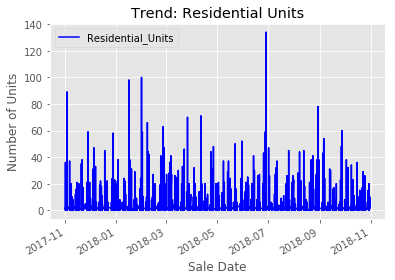

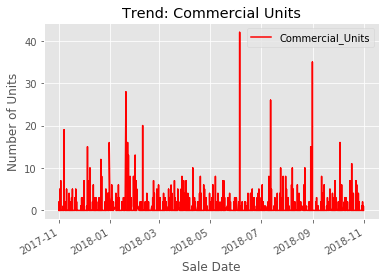

In [10]:
# Plot the number of Residential Units and Commercial Units sold in the given time period.

df.plot(y='Residential_Units', use_index=True, color='blue')
plt.title('Trend: Residential Units')
plt.xlabel('Sale Date')
plt.ylabel('Number of Units')

df.plot(y='Commercial_Units', use_index=True, color='red')
plt.title('Trend: Commercial Units')
plt.xlabel('Sale Date')
plt.ylabel('Number of Units')

plt.show()

* The sale of Residential or Commercial Units do not exhibit a consistent pattern in the sales trend.
* However, it shows that more number Residential Units were sold compared to the Commercial Units in the given period.

#### 9. Frequency Distribution of Sale Prices

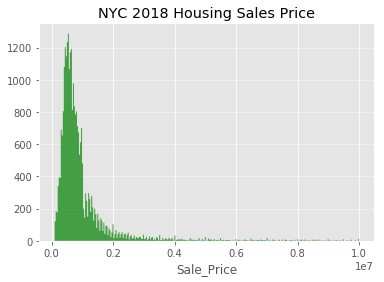

In [11]:
# Histogram to represent the frequency distribution of the Sale Prices for the 2017-18 NYC Housing
plt.hist(df.Sale_Price, bins=300, histtype='stepfilled', alpha=0.7, color='green', rwidth=1)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Sale_Price')
plt.title('NYC 2018 Housing Sales Price')
plt.show()

* Frequency Distribution shows majority of the Price values below 10000000.
* There are only a few selected values above that range.

#### 10. Plot Aggregate Building Class Category 

#Aggregate Building Class Category 
df.groupby([df.index.time,'Building_Class_Category'])['Building_Class_Category'].size().unstack().plot(kind='bar',stacked=True, legend=True)
plt.legend(loc='best', bbox_to_anchor=(1, .7, 1, 0.5))
plt.xlabel('Building Class Category')
plt.ylabel('Number of Buildings')
plt.title('Aggregate of the Building Class Category ')
plt.show()

* One family dwellings are the greatest in the building class category.
* Close to it are the two family dwellings.

#### 11. Correlation between the NYC Housing Sale variables

In [12]:
# To illustrate correlation between the different factors of the NYC Housing Sale records 
correlation = df.corr(method = 'pearson')
print(correlation)

                   Residential_Units  Commercial_Units  Total_Units  \
Residential_Units           1.000000          0.021318     0.975963   
Commercial_Units            0.021318          1.000000     0.238692   
Total_Units                 0.975963          0.238692     1.000000   
Land_Sq_Ft                  0.021429          0.144841     0.052387   
Gross_Sq_Ft                 0.520122          0.419695     0.596690   
Year_Built                 -0.082653         -0.023035    -0.085303   
Sale_Price                  0.424865          0.280078     0.473731   

                   Land_Sq_Ft  Gross_Sq_Ft  Year_Built  Sale_Price  
Residential_Units    0.021429     0.520122   -0.082653    0.424865  
Commercial_Units     0.144841     0.419695   -0.023035    0.280078  
Total_Units          0.052387     0.596690   -0.085303    0.473731  
Land_Sq_Ft           1.000000     0.613128    0.026617    0.086469  
Gross_Sq_Ft          0.613128     1.000000   -0.020431    0.405991  
Year_Built       

* There is a high degree of correlation between Residential_Units and Total Units, Commercial_Units and Gross_Sq_Ft, Sale_Price and Total_Units. 
* Also, there is a negative correlation between Sale_Price and Year_Built

#### 12. Correlation Matrix using HeatMap

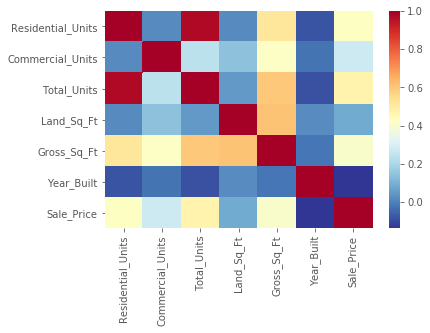

In [13]:
# Illustrate a correlation matrix using heatmap to understand the degree of covariance between variables of NYC Housing Sales records
sns.heatmap(df.corr(),cmap='RdYlBu_r')
plt.show()

Heatmap of the Correlation matrix graphically represents the below points which are consistent with our values of Correlation.
* There is a high degree of correlation between Residential_Units and Total Units, Commercial_Units and Gross_Sq_Ft, Sale_Price and Total_Units. 
* Also, there is a negative correlation between Sale_Price and Year_Built

In [14]:
import statsmodels.api as sm

#### 13. Simple Linear Regression
* Take Total_Units to be the independent variable
* The dependent variable is Sale_Price
* Use simple linear regression to see if we can predict Sale Price of a property given the Total number of units in it.

In [15]:
# Simple Linear regression to determine the relation between Sale Price and the Total Units in the listed property.
X = df['Total_Units']
y = df['Sale_Price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     7881.
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:45:16   Log-Likelihood:            -4.1413e+05
No. Observations:               27239   AIC:                         8.283e+05
Df Residuals:                   27237   BIC:                         8.283e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.545e+05   6904.734     94.787      0.000    6.41e+05    6.68e+05
Total_Units  1.476e+05   1662.086     88.777      0.000    1.44e+05    1.51e+05
==============================================================================
Omnibus:                    22319.707   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1285336.961
Skew:                           3.556   Prob(JB):                         0.00
Kurtosis:                      35.893   Cond. No.                         4.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Results of Simple Linear Regression:**
* R-squared of 0.22: Reflects loose fit of the data with limited variability of the response data.
* P-value < 0.05: Regression coefficients are significant.
* Absolute t-value > 2: 
Summary from the OLS output indicates:
* Omnibus/Prob(Omnibus) and Skew value are higher, hence the model lacks normalcy.
* Kurtosis is high to indicate a tighter clustering of residuals around zero.
* Durbin-Watson value indicates a positive autocorrelation.
    

### 14. Linear Fit Plot

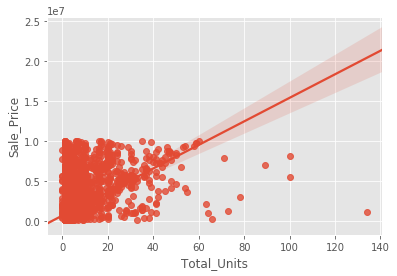

In [17]:
sns.regplot(x='Total_Units', y='Sale_Price', data=df);

* Linear Regression Fit shows that there are number of well fitted data points. 
* However, regression line does not fit all of the datapoints.
* There are a certain number of outliers as well. 

#### 15. Multiple Linear Regression

In [18]:
# Multiple Linear regression to determine the relation of dependent variable Sale Price with other variables.
X = df[['Gross_Sq_Ft', 'Total_Units']]
y = df['Sale_Price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     4492.
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:45:47   Log-Likelihood:            -4.1371e+05
No. Observations:               27239   AIC:                         8.274e+05
Df Residuals:                   27236   BIC:                         8.274e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.267e+05   6864.791     91.297      0.000    6.13e+05     6.4e+05
Gross_Sq_Ft    41.4617      1.418     29.247      0.000      38.683      44.240
Total_Units   1.12e+05   2039.468     54.898      0.000    1.08e+05    1.16e+05
==============================================================================
Omnibus:                    20130.142   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1639922.904
Skew:                           2.888   Prob(JB):                         0.00
Kurtosis:                      40.571   Cond. No.                     6.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Results of Multiple Linear Regression:**
* R-squared of 0.25: Reflects loose fit of the data with limited variability of the response data .
* P-value < 0.05: Regression coefficients are significant.
* Absolute t-value > 2: 
Also, Adjusted R-square shows increase compared to our previous model, indicating the new independent variables added have siginificance.
Summary from the OLS output indicates:
* Omnibus/Prob(Omnibus) and Skew value are higher, hence the model lacks normalcy.
* Kurtosis is high to indicate a tighter clustering of residuals around zero.
* Durbin-Watson value indicates a positive autocorrelation.

The overall model shows limited variability between the dependent and independent variables.


### Trends in the NYC Housing market thus far.##
A trend we wanted to identify is the
positive correlation between **sale price** of the housing and **the sq ft of the land**. We hypothesized that
_the more land space the higher the sale price , because in CT we see a strong positive relation
with sq foot and price._

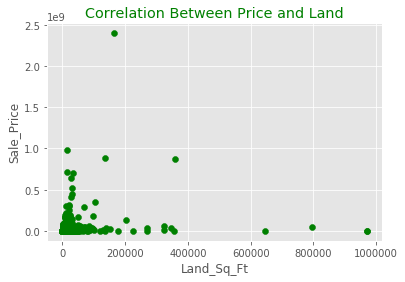

In [21]:
#Use a scatterplot to relfect the correation between Land_Sq_Ft and Sale_Price
x= data.Land_Sq_Ft
y= data.Sale_Price

plt.xlabel('Land_Sq_Ft')
plt.ylabel('Sale_Price')
plt.title('Correlation Between Price and Land',color='g')
plt.scatter(x,y, c='g')

* Our scatterplot allowed us to see reject our hypothesis. In NYC Housing market, the land sq ft does not have a strong positive relationship with sale price.

### ScatterMatrix to showcase correlations between variables we identified earlier

In [ ]:
#ScatterMatrix to showcase correlations between variables we identified earlier
pd.scatter_matrix(data.loc[:,'Residential_Units':'Sale_Price'], figsize= (12,12),diagonal='kde')
#kde (kernel density estimation) changes the aesthetic for sale price more 